# LogisticRegression

### Import libraries and packages and read processed dataset as *.csv file

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
import pickle



RANDOM_SEED=256

data = pd.read_csv("./dataset/DatasetProcessed.csv")

churn = data.loc[:, data.columns == "Churn"].columns

### Splitting into train and test dataset and preprocessing with StandardScaler from sklearn library

In [17]:
train_cols = data.drop('Churn', axis='columns').columns
X = data[train_cols]
y = data[churn]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

`InterpretML library has API for the visual explanation of dataset. We can get the information like the distribution of positive and negative target values and the distribution depending on the chosen features.`

In [19]:
X_train_df = pd.DataFrame(X_train, columns=X.columns.to_list())
y_train_df = pd.DataFrame(y_train, columns=y.columns.to_list())
from interpret import show
from interpret.provider import InlineProvider
from interpret import set_visualize_provider
set_visualize_provider(InlineProvider())
from interpret.data import ClassHistogram
hist = ClassHistogram().explain_data(X_train_df, y_train_df, name="Train Data")
show(hist)

`The dataset is imbalanced as we concluded in notebook with number 01.`

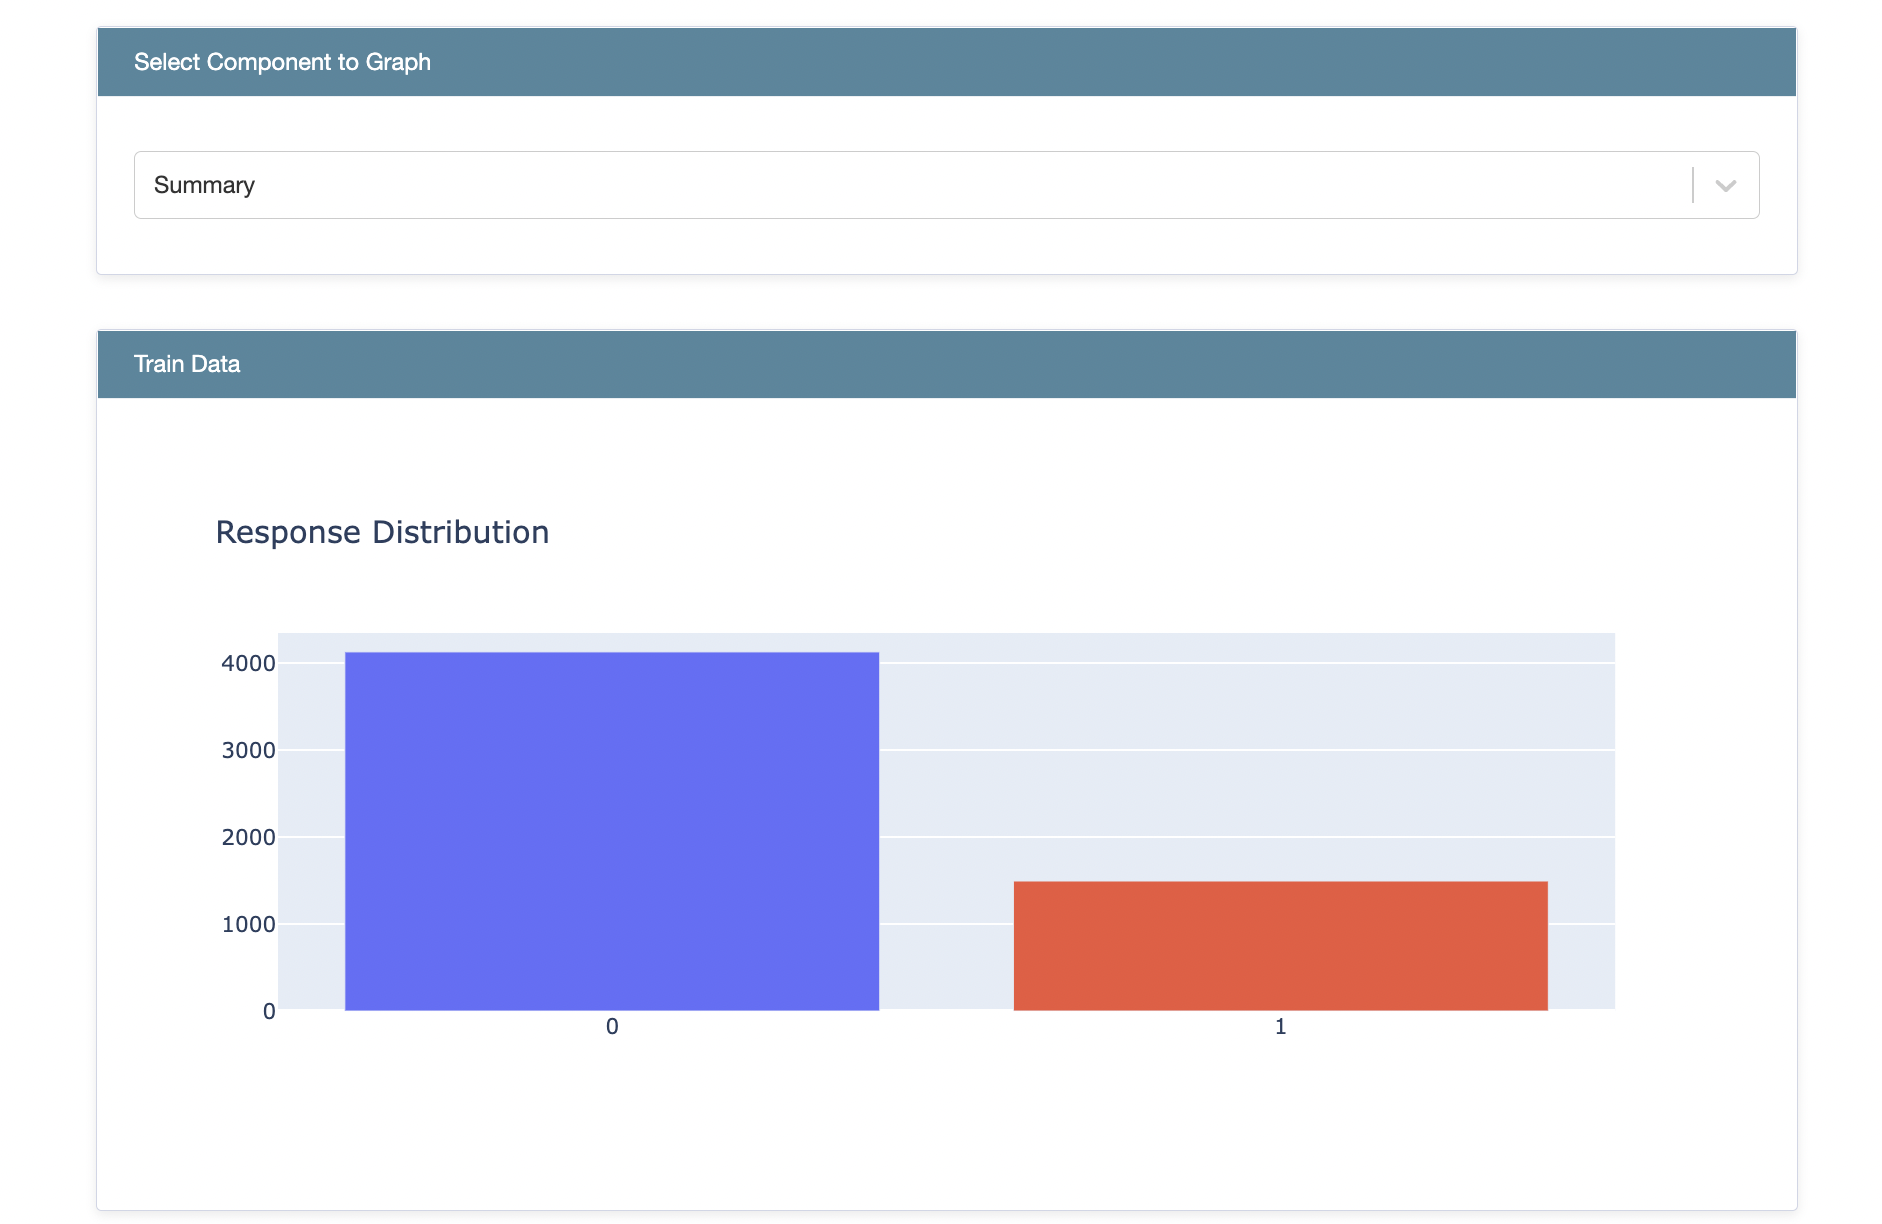

`It is more probable that the new customer will leave the company compared to the loyal customer.`

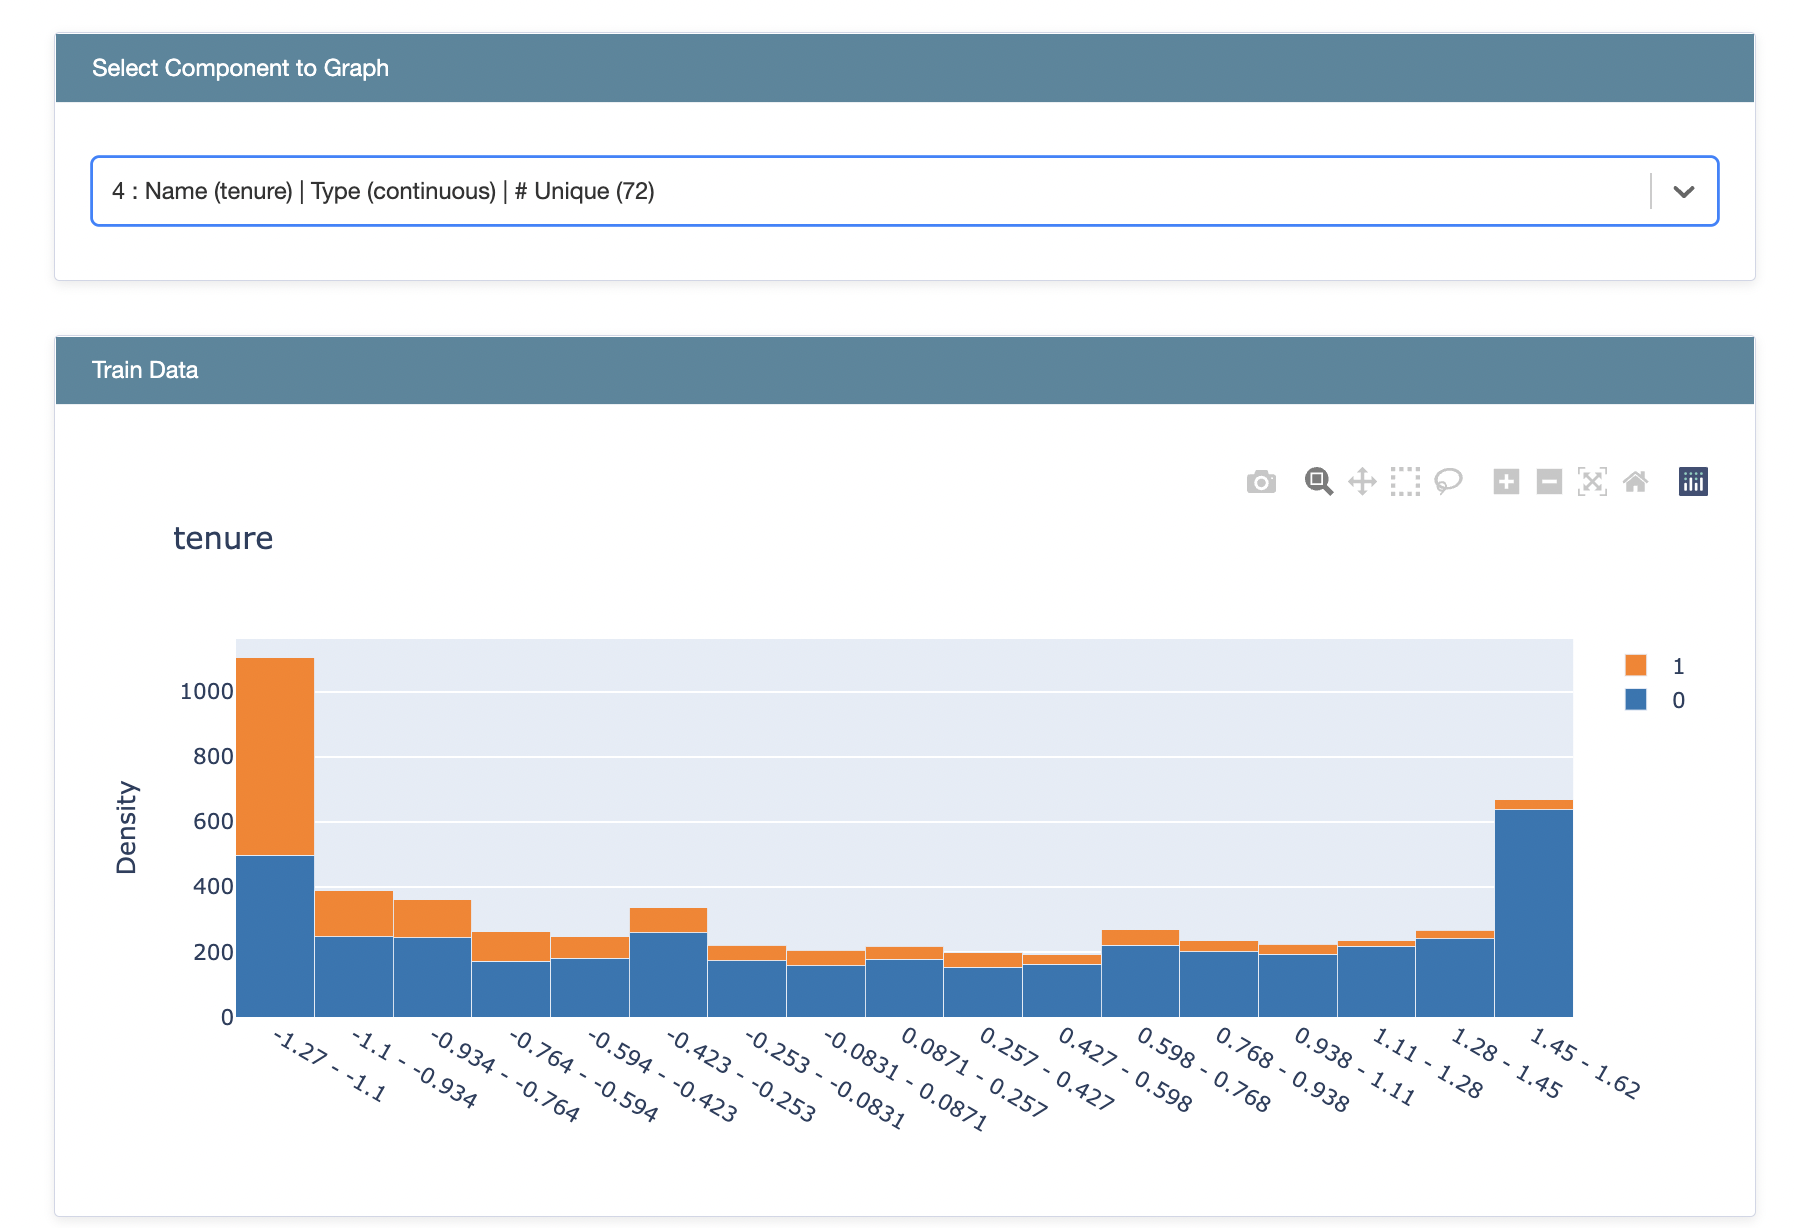

`If the customer does not have dependents, then it is more probable he will leave the company.`

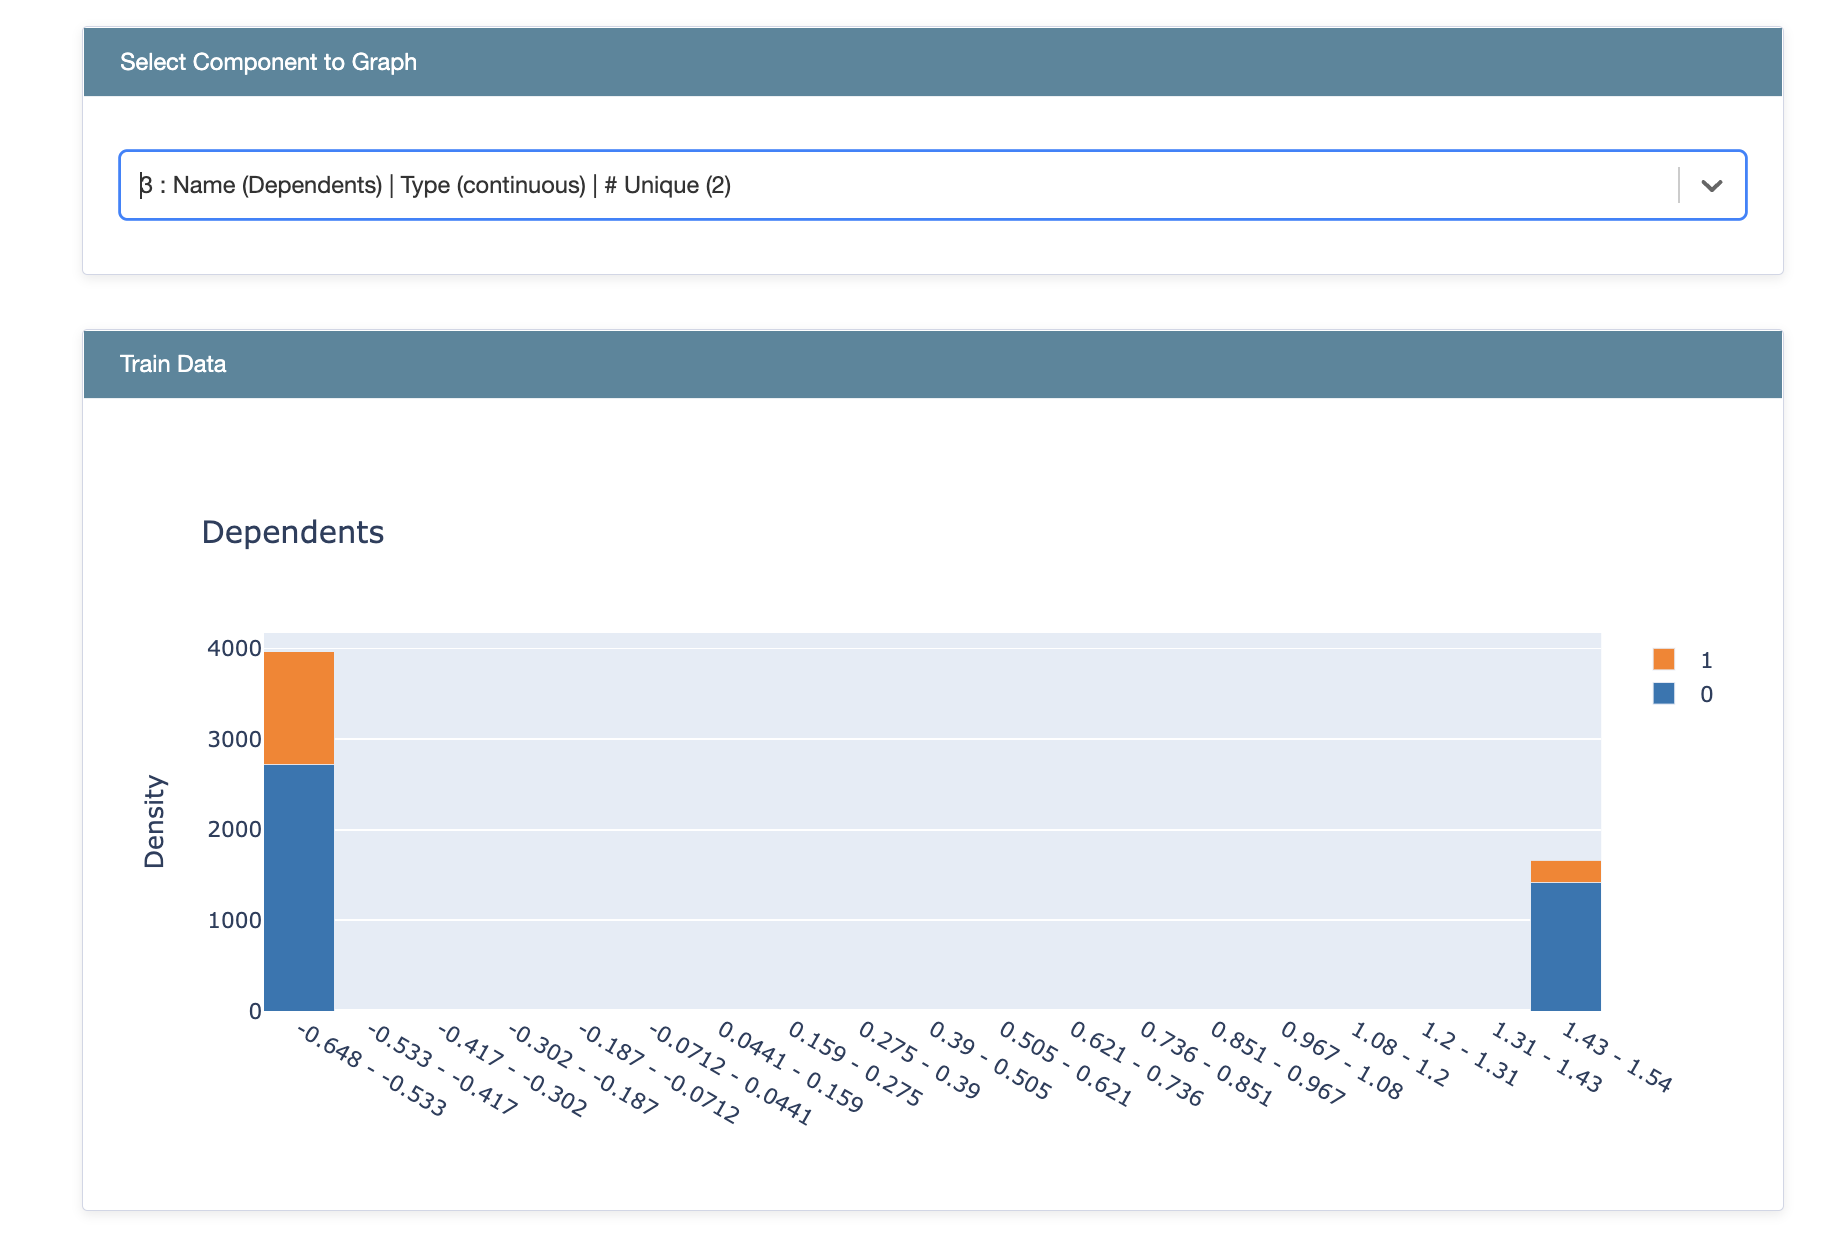

`If the customer is not a senior citizen, then it is more probable he will leave the company compared to the senior one.`

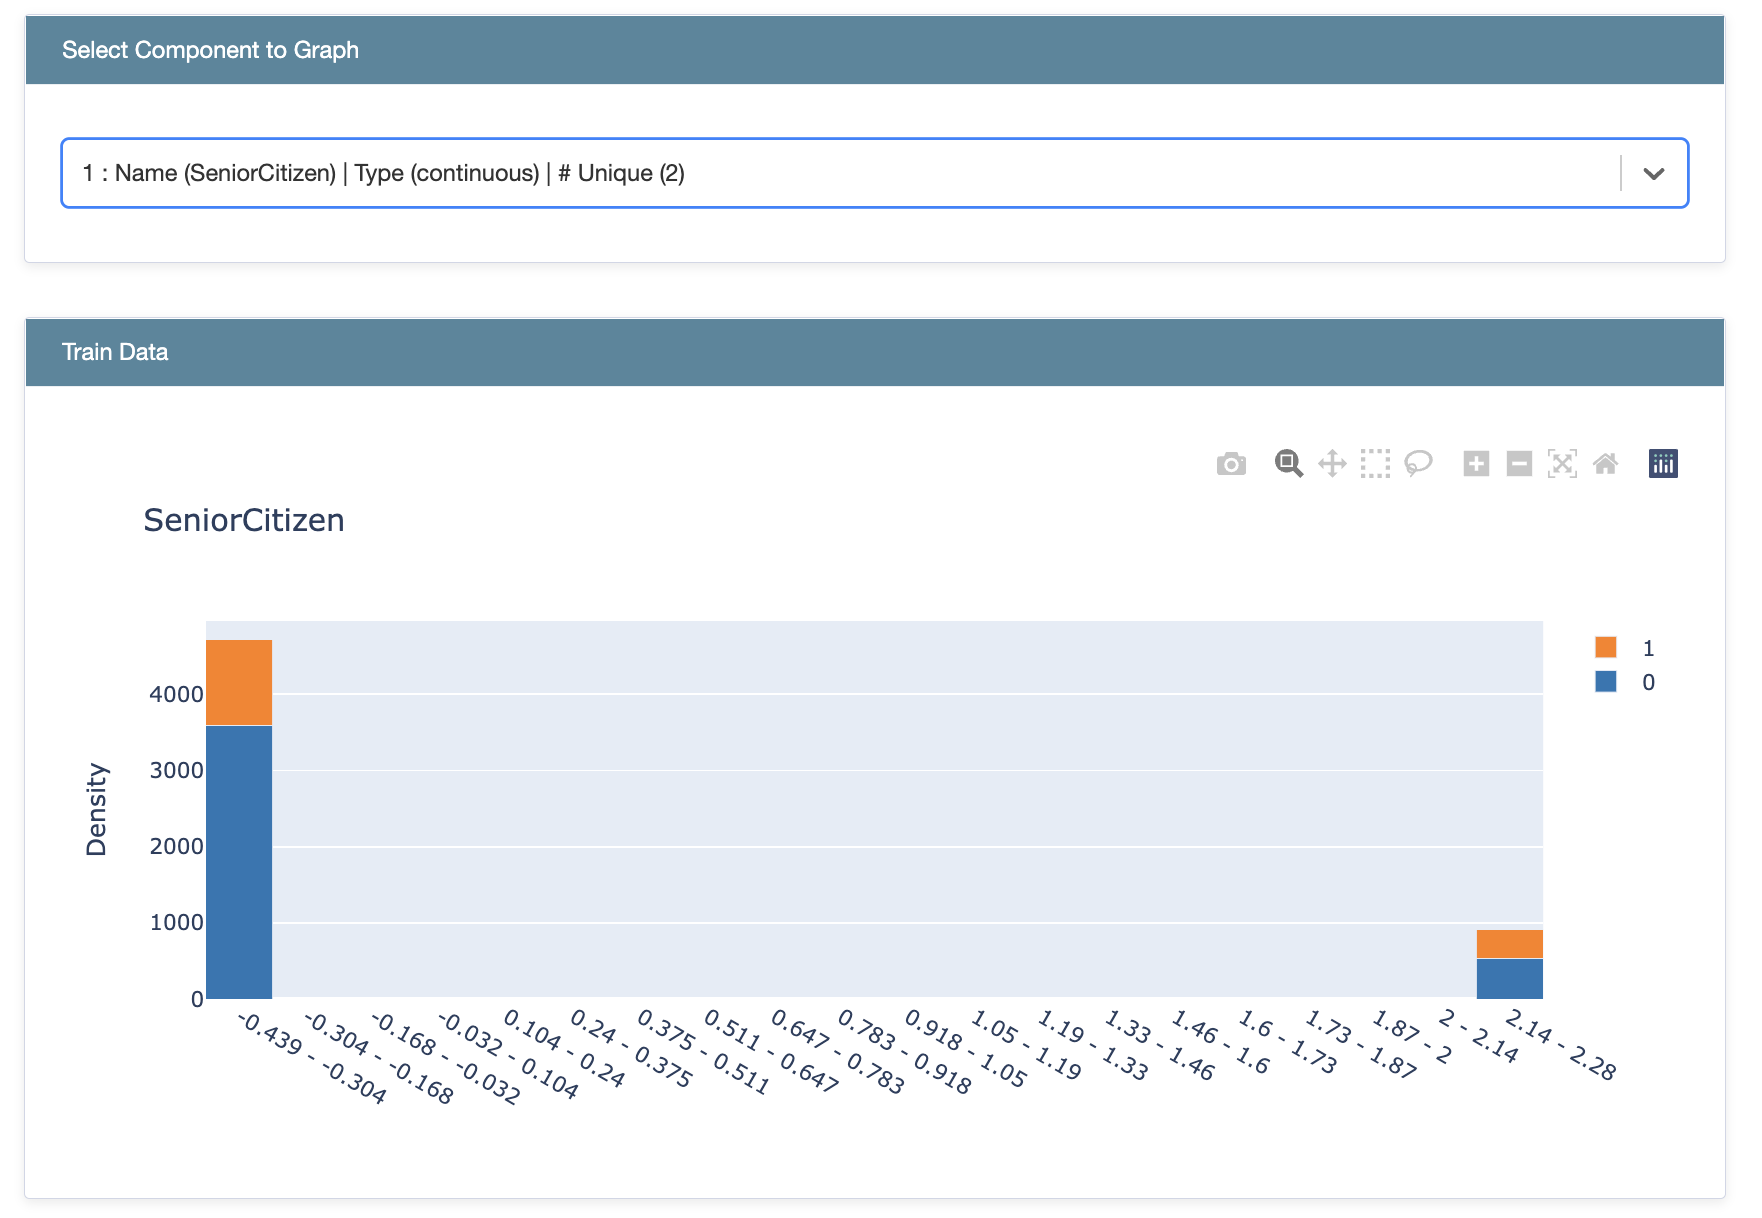

### Applying LogisticRegression model from interpret.glassbox package

In [20]:
columns = X.columns.to_list()

In [21]:
from interpret.glassbox import LogisticRegression
lr = LogisticRegression(feature_names=columns, random_state=RANDOM_SEED)
lr.fit(X_train, y_train)


In [22]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [23]:
from interpret import show

lr_global = lr.explain_global()
show(lr_global)

`We assume that this model also predicts the significance of the features "tenure", "TotalCharges" and "InternetService_Fiber optic".`

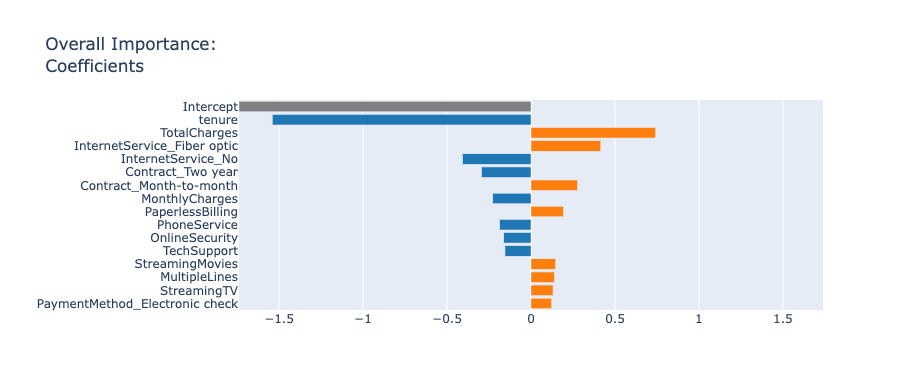

In [24]:
lr_local = lr.explain_local(X_test[:50], y_test[:50])
show(lr_local)

`This is the new customer with low total charges. Model predicts that he left the company and it is true.`

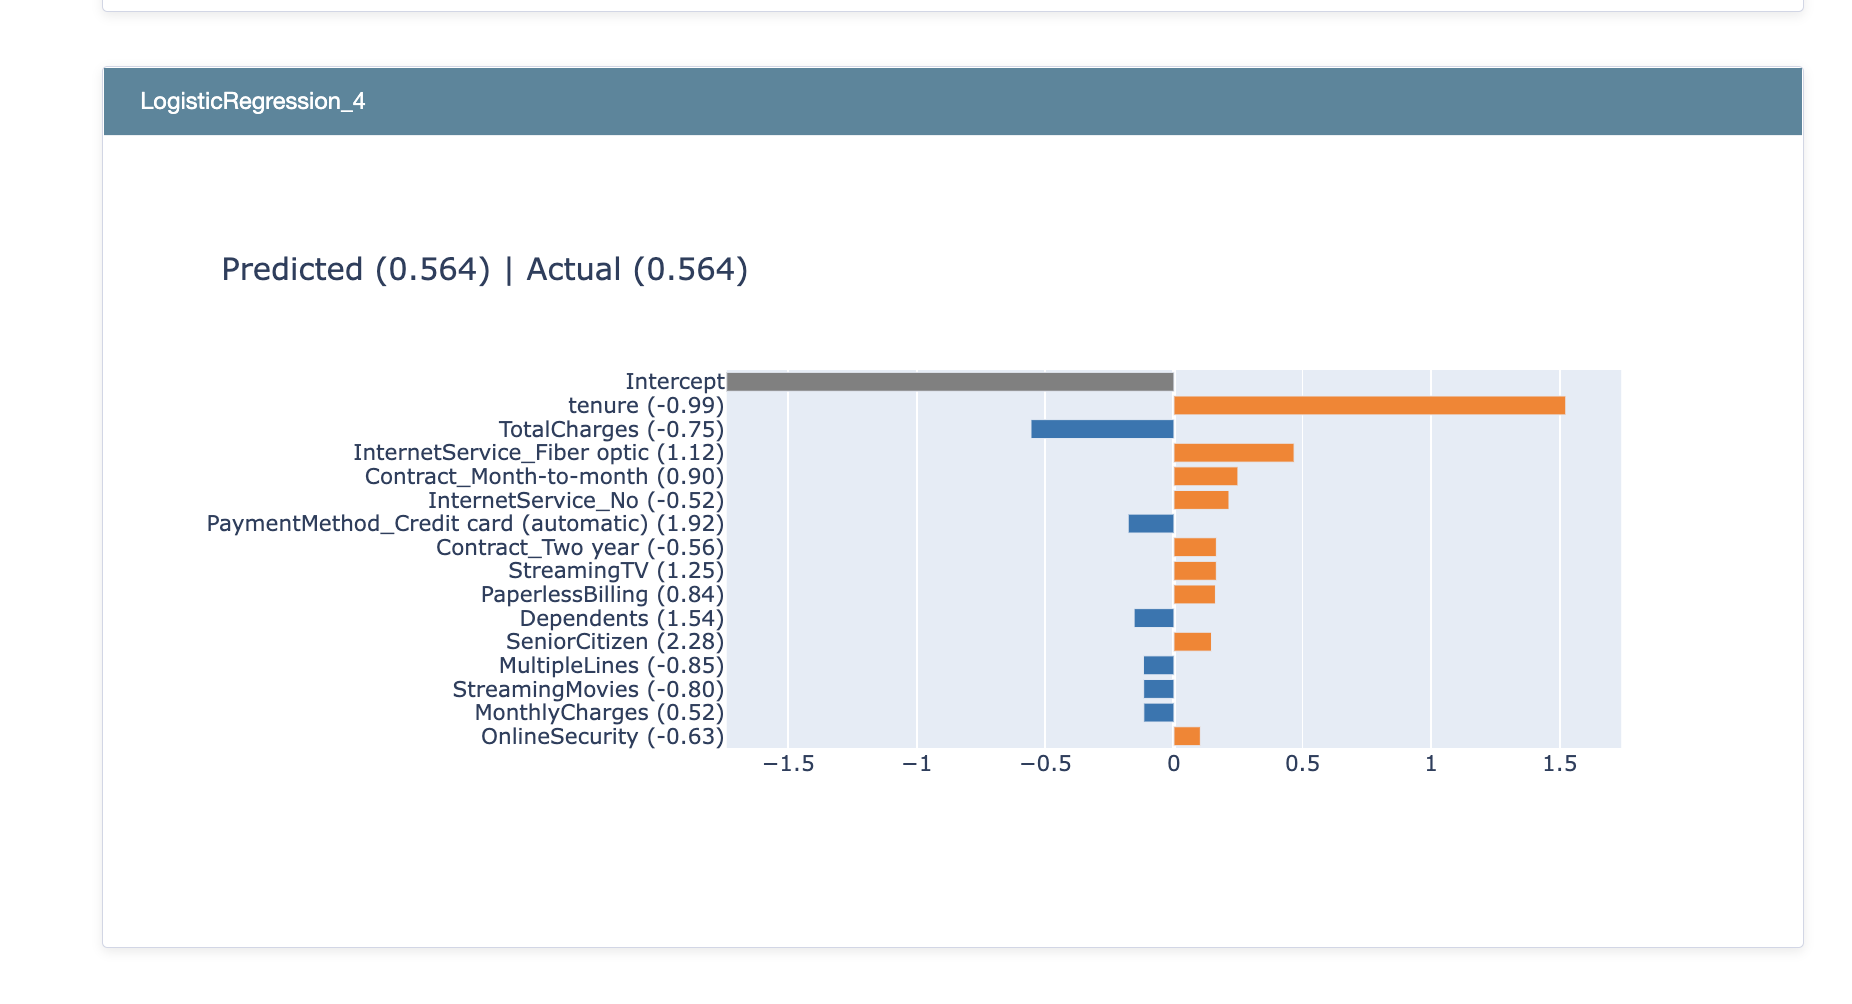

In [25]:
print("Train accuracy score : {}, Test accuracy score : {} ".format(lr.score(X_train,y_train), lr.score(X_test,y_test)))

Train accuracy score : 0.8097777777777778, Test accuracy score : 0.7953091684434968 


In [26]:
y_predicted = lr.predict(X_test)

`This model has better recall value than the previous models. The recall value is 0.52, while the previous models have 0.49. The precision value is lower then precision in the previous models.`

In [27]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### Confusion matrix

In [28]:
cf_matrix = confusion_matrix(y_test, y_predicted)

<AxesSubplot:>

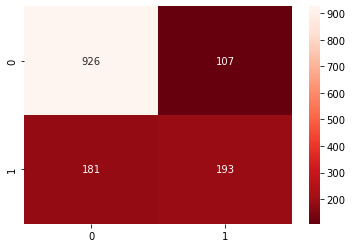

In [29]:
sns.heatmap(cf_matrix, annot=True, fmt='.22g', cmap='Reds_r')


`Interpret library has API for visualize the ROC Curve. We can demonstrate how it works and presents the curve.`

In [31]:
from interpret import perf
roc = perf.ROC(lr.predict_proba, feature_names=X.columns)
roc_explanation = roc.explain_perf(X_test, y_test)
show(roc_explanation)

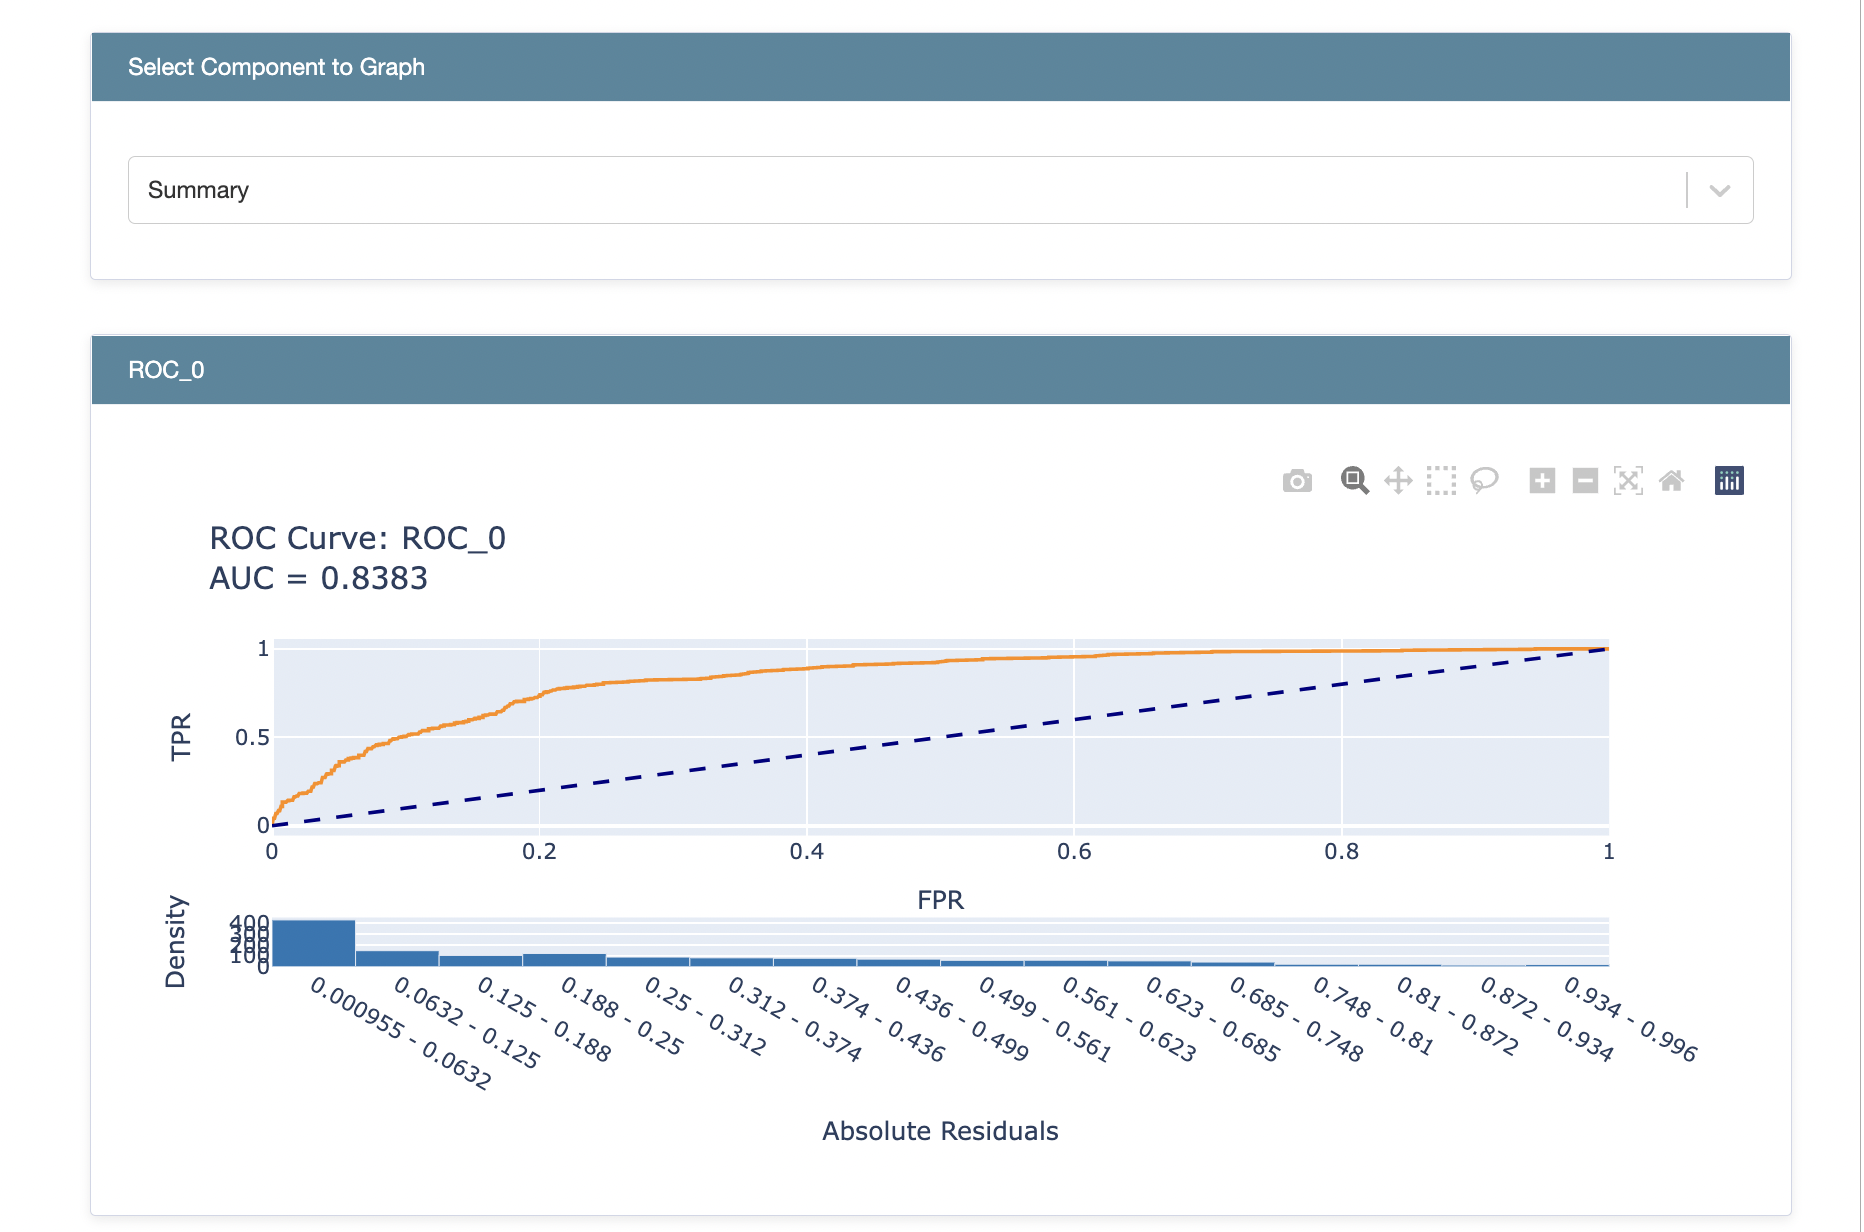

## Saving model and scaler

In [33]:
model_filename = './saved_models/LogisticRegression.model'

with open(model_filename, 'wb') as pickle_file:
    pickle.dump(lr, pickle_file)
    
scaler_filename = './saved_models/LogisticRegression.scaler'

with open(scaler_filename, 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)